<a href="https://colab.research.google.com/github/JoaquinV13/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Capstone%2C_Joaquin_Vilaplana_y_Adri%C3%A1n_Garc%C3%ADa_Arroba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hecho por: Joaquín Manuel Vilaplana y Adrián García-Arroba

# Introducción

El propósito de nuestro proyecto final es aprovechar la oportunidad de aplicar los conceptos que hemos adquirido a lo largo del curso de Aprendizaje Automático en un entorno práctico y con datos reales. Desde el comienzo de la asignatura, nos hemos organizado en grupo (en este caso siendo dos personas) con el objetivo de abordar un desafío específico, ya sea en el ámbito de clasificación, regresión o algoritmos genéticos.

Se han hecho varias entregas a lo largo del curso. Todas se debían hacer en formato Jupyter Notebook en Google Colab. Como hay problemas a la hora de guardar si más de una persona está conectada, lo que hemos hecho es ponernos de acuerdo cada vez que uno se conectaba. Otra opción también ha sido trabajar con copias del original, y, en caso de estar bien una parte se añade al original sin que la otra persona esté conectada ahí.

En la primera práctica el objetivo era trabajar con los principios básicos de las Redes de Neuronas Artificiales. El modelo creado fue capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías utilizando el conjunto de datos Fashion-MNIST de Keras. Se proporcionaron pautas específicas para la configuración y entrenamiento del modelo, así como para la evaluación y mejora del mismo.

La segunda práctica consistía en la implementación de dos modelos de aprendizaje automático: Perceptrón y Adaline. Después de clasificar datos, había que responder preguntas sobre los gráficos y rendimientos de los modelos. Se trabajó el algoritmo de Gradiente Descendente Estocástico (SGD) y diversos conceptos como por ejemplo la frontera de decisión.

La tercera práctica consistió en crear y entrenar un modelo de Redes Neuronales Convolucionales (CNN) para la clasificación de imágenes en 100 categorías utilizando el conjunto de datos CIFAR-100. Se trabajó mucho los hiperparámetros como la tasa de aprendizaje, el tamaño del lote y el número de épocas. También se profundizaron conceptos clave como Batch Normalization y Dropout.

En la cuarta práctica se empleó el Algoritmo Genético. Se debía encontrar el máximo de una función en un dominio determinado. También utilizar la función de Rastringin y comparar el Algoritmo Genético con un punto de cruce y con dos.

Queremos usar todas las herramientas y técnicas que hemos aprendido para desarrollar soluciones innovadoras. Cuando entreguemos nuestro proyecto final, no será solo una evaluación de nuestras habilidades, sino una oportunidad para mostrar lo lejos que hemos llegado y lo creativos que podemos ser. Estamos emocionados por este desafío y ansiosos por compartir los resultados de nuestro esfuerzo al final del cuatrimestre.

# Datos


La base de datos se llama: Fitness Club Dataset for ML Classification.

(Datacamp's Data Science Associate Practical Certification dataset)

Fue extraída de la web Kaggle en el siguiente link:https://www.kaggle.com/datasets/ddosad/datacamps-data-science-associate-certification?rvi=1

Su uso es de domonio público.

Después de una búsqueda y análisis de diferentes bases de datos, acabamos seleccionando esta por su posible comercialización, es un problema a resolver muy tangible y porque no se han encontrado proyectos en internet en el que se resuelva. Además, las variables, haciendo diversos cambios que posteriormente mencionaremos, son muy manejables.

Nuestra propuesta consiste en un gimnasio que nos ha pedido ayuda con la logística y organización de las diferentes actividades que organiza diariamente.

Se puede reservar una clase de zumba, pilates, bici o lo que sea, el problema surge cuando una clase se llena (y por culpa de eso no se puede apuntar más gente) y luego hay alguna baja, cierta persona no asiste y en consecuencia se pierde esa plaza.

Debido a que la tasa de inasistencia es muy alta, se nos pide estudiar diversas variables de cada persona y poder llegar a predecir si va a asistir o no. Por lo tanto, se va a estudiar una base de datos con 1500 reservas y con información en cada una de ellas del miembro del club que la hizo.

La base de datos esta compuesta por 8 columnas con los siguientes atributos, el identificador de la reserva, los meses que lleva de membresía el socio, su peso, los días de antelación con los que reservó, el día de la semana de la clase, la hora de la clase si es ante meridiem o post meridiem, el tipo de clase y, por último, si asiste o no.

In [775]:
# Bibliotecas.
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import models
from keras import layers

In [776]:
# Lee el archivo CSV usando pandas.
nombre_archivo = 'fitness_class_2212.csv'
df = pd.read_csv(nombre_archivo)

df.head() # Visualización del contenido del archivo.

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [777]:
df.shape # Tamaño de la base de datos.

(1500, 8)

Se comprueba que no haya niguna fila con valores del tipo NA y si la hay, se elimina.

In [778]:
if df.isna().any(axis=1).any():
    df = df.dropna()
    print("Se eliminaron filas con valores NA.")

else:
    print("No se encontraron filas con valores NA.")

df.shape # Nuevo tamaño de la base de datos.

Se eliminaron filas con valores NA.


(1480, 8)

Se acabaron eliminando 20 filas con ese valor.

Se tiene un archivo con 1480 filas y 8 columnas, resulta que la etiqueta principal que es , si ha asistido a la clase o no, se encuentra en una de esas columnas lo cual se tendrá que separar del resto creando los valores por un lado y sus etiquetas por otro.

Cabe recalcar que en una de las columnas representa el booking_id, el identificador de la reserva, cuyo valor no tiene ninguna correlación con el posible resultado de asistir o no a la clase, es por ello que esta columna se eliminará.

In [779]:
df = df.drop(df.columns[0], 1) # Se elimina la primera columna, booking_id.
dflabel = df.pop(df.columns[6]) # Se asignan las etiquetas a otra variable.
print('El tamaño del archivo mdificado es de:',df.shape,'\n\n')
print('El tamaño de las etiquetas es de:',dflabel.shape,'\n\n')

El tamaño del archivo mdificado es de: (1480, 6) 


El tamaño de las etiquetas es de: (1480,) 




<ipython-input-779-89fc83b7d7fa>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df.columns[0], 1) # Se elimina la primera columna, booking_id.


Se procede a comprobar ahora en qué formato se encuentran los valores del archivo.

In [780]:
for i in range(df.shape[1]):
  print(type(df.iloc[0, i])) # Formato de las variables de los datos.

<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


La primera variable, perteneciente a los meses de membresía, son números enteros, la segunda, el peso, son números reales y todos los demás están en formato 'string' cadena.

In [781]:
print(type(dflabel.iloc[0]))

<class 'numpy.int64'>


Las etiquetas son números enteros, de hecho son el 0, representando la no asistencia, y el 1, asiste.

Acontinuación, se va a proceder al recuento del número de veces que aparecen cada una de las variables categóricas de las reservas para ver si esos atributos aparecen un número parecido de veces. En caso contrario, los datos para poder entrenar el modelo estarían desequilibrados ya que habría más información de un tipo que de otro.

In [782]:
for columna in df.columns[3:6]:
    conteo_valores = df[columna].value_counts().to_string()
    print(f"Valores únicos para la columna '{columna}':\n{conteo_valores}\n")

Valores únicos para la columna 'day_of_week':
Fri          277
Thu          235
Mon          215
Sun          211
Sat          200
Tue          192
Wed           79
Wednesday     35
Fri.          26
Monday        10

Valores únicos para la columna 'time':
AM    1130
PM     350

Valores únicos para la columna 'category':
HIIT        657
Cycling     370
Strength    231
Yoga        135
Aqua         74
-            13



En el anterior recuento se ven ciertas redundancias en los días de la semana, en el miércoles, el viernes y el lunes, se procede a resolverlas.

In [783]:
# Reemplazar el string 'Fri.' por 'Fri' en la columna 'day_of_week'.
df['day_of_week'] = df['day_of_week'].replace('Fri.', 'Fri')

# Reemplazar el string 'Wednesday' por 'Wed' en la columna 'day_of_week'.
df['day_of_week'] = df['day_of_week'].replace('Wednesday', 'Wed')

# Reemplazar el string 'Monday' por 'Mon' en la columna 'day_of_week'.
df['day_of_week'] = df['day_of_week'].replace('Monday', 'Mon')

# Imprimir los valores únicos actualizados.
for columna in df.columns[3:6]:
    conteo_valores = df[columna].value_counts().to_string()
    print(f"Valores únicos para la columna '{columna}':\n{conteo_valores}\n")

Valores únicos para la columna 'day_of_week':
Fri    303
Thu    235
Mon    225
Sun    211
Sat    200
Tue    192
Wed    114

Valores únicos para la columna 'time':
AM    1130
PM     350

Valores únicos para la columna 'category':
HIIT        657
Cycling     370
Strength    231
Yoga        135
Aqua         74
-            13



In [784]:
conteo_valores = dflabel.value_counts().to_string()
print(f"Valores únicos para la etiqueta:\n{conteo_valores}\n")

Valores únicos para la etiqueta:
0    1031
1     449



Un posible problema que podríamos encontrar es que el modelo sepa predecir mejor si el cliente no asistirá que al contrario ya que en nuestro conjunto de datos hay más información de aquellos clientes que no asisten que los que sí craando un desequilibrio. Se procederá a probar en qué casos el modelo predecirá mejor, si con los datos que tenemos actualmente, eliminando parte de las reservas en los que los clientes no asisten o realizando un aumento de los datos de clientes que sí asisten mediante la función SMOTE cuya explicación se dará próximamente.

Facilitaría al modelo para su convergencia transformar las variables categóricas de tipo string a one-hot encoding.

One-hot encoding es un método para convertir variables categóricas en representaciones numéricas, creando columnas binarias (0 o 1) para cada categoría única en la columna original.

Ello se realiza con el siguiente código, se transforman primero las variables del día de la semana.

In [785]:
# Visualización del contenido del archivo antes de One-Hot Encoding.
print("Antes de One-Hot Encoding:")
print(df.head())

# Aplica One-Hot Encoding a la columna 'day_of_week'.
df = pd.get_dummies(df, columns=['day_of_week'], prefix='day')

# Visualización después de One-Hot Encoding.
print("\nDespués de One-Hot Encoding:")
print(df.head())

Antes de One-Hot Encoding:
   months_as_member  weight days_before day_of_week time  category
0                17   79.56           8         Wed   PM  Strength
1                10   79.01           2         Mon   AM      HIIT
2                16   74.53          14         Sun   AM  Strength
3                 5   86.12          10         Fri   AM   Cycling
4                15   69.29           8         Thu   AM      HIIT

Después de One-Hot Encoding:
   months_as_member  weight days_before time  category  day_Fri  day_Mon  \
0                17   79.56           8   PM  Strength        0        0   
1                10   79.01           2   AM      HIIT        0        1   
2                16   74.53          14   AM  Strength        0        0   
3                 5   86.12          10   AM   Cycling        1        0   
4                15   69.29           8   AM      HIIT        0        0   

   day_Sat  day_Sun  day_Thu  day_Tue  day_Wed  
0        0        0        0       

Acontinuación se transforman a one-hot encoding las variables que determinan el tipo de clase, strength, HIIT...

In [786]:
# Visualización del contenido del archivo antes de One-Hot Encoding.
print("Antes de One-Hot Encoding:")
print(df.head())

# Aplica One-Hot Encoding a la columna 'category'.
df = pd.get_dummies(df, columns=['category'], prefix='category')

# Visualización después de One-Hot Encoding.
print("\nDespués de One-Hot Encoding:")
print(df.head())

Antes de One-Hot Encoding:
   months_as_member  weight days_before time  category  day_Fri  day_Mon  \
0                17   79.56           8   PM  Strength        0        0   
1                10   79.01           2   AM      HIIT        0        1   
2                16   74.53          14   AM  Strength        0        0   
3                 5   86.12          10   AM   Cycling        1        0   
4                15   69.29           8   AM      HIIT        0        0   

   day_Sat  day_Sun  day_Thu  day_Tue  day_Wed  
0        0        0        0        0        1  
1        0        0        0        0        0  
2        0        1        0        0        0  
3        0        0        0        0        0  
4        0        0        1        0        0  

Después de One-Hot Encoding:
   months_as_member  weight days_before time  day_Fri  day_Mon  day_Sat  \
0                17   79.56           8   PM        0        0        0   
1                10   79.01           2   

Por último, se convierte en codificación binaria la hora en la que se realiza la clase.

In [787]:
# Visualización del contenido del archivo antes de la conversión.
print("Antes de la conversión:")
print(df['time'].head())

# Mapear 'AM' a 0 y 'PM' a 1 en la columna 'time'.
df['time'] = df['time'].map({'AM': 0, 'PM': 1})

# Visualización después de la conversión.
print("\nDespués de la conversión:")
print(df['time'].head())

Antes de la conversión:
0    PM
1    AM
2    AM
3    AM
4    AM
Name: time, dtype: object

Después de la conversión:
0    1
1    0
2    0
3    0
4    0
Name: time, dtype: int64


De esta forma la base de datos quedaría así:

In [788]:
print(df.head())# Ejemplo de los 5 primeros datos.

   months_as_member  weight days_before  time  day_Fri  day_Mon  day_Sat  \
0                17   79.56           8     1        0        0        0   
1                10   79.01           2     0        0        1        0   
2                16   74.53          14     0        0        0        0   
3                 5   86.12          10     0        1        0        0   
4                15   69.29           8     0        0        0        0   

   day_Sun  day_Thu  day_Tue  day_Wed  category_-  category_Aqua  \
0        0        0        0        1           0              0   
1        0        0        0        0           0              0   
2        1        0        0        0           0              0   
3        0        0        0        0           0              0   
4        0        1        0        0           0              0   

   category_Cycling  category_HIIT  category_Strength  category_Yoga  
0                 0              0                  1          

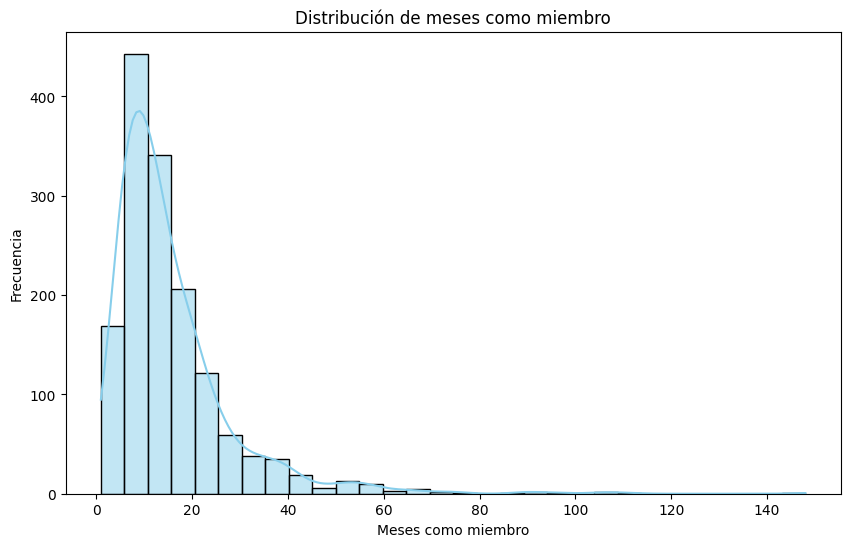

In [789]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Gráfico de la primera columna 'months_as_member'.
plt.figure(figsize=(10, 6))
sns.histplot(df['months_as_member'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de meses como miembro')
plt.xlabel('Meses como miembro')
plt.ylabel('Frecuencia')
plt.show()

In [790]:
# Estadísticas básicas de 'months_as_member'.
estadisticas1 = df['months_as_member'].describe()

# Visualización de estadísticas.
print(estadisticas1)

count    1480.000000
mean       15.659459
std        12.971138
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64


Número de Observaciones (Count): Hay 1480 observaciones en la variable 'months_as_member'. Esto indica el tamaño del conjunto de datos.

Media (Mean): La media es aproximadamente 15.66 meses. Indica el valor promedio de la variable 'months_as_member' en el conjunto de datos.

Desviación Estándar (Std): La desviación estándar es aproximadamente 12.97 meses. Muestra la dispersión de los datos alrededor de la media. En este caso, la desviación estándar es relativamente alta, indicando una variabilidad significativa en los meses de membresía.

Valor Mínimo y Máximo (Min y Max): El valor mínimo es 1 mes, y el valor máximo es 148 meses. Esto proporciona información sobre el rango de la variable.

Percentiles (25%, 50%, 75%): Estos son valores que dividen los datos en porcentajes. El percentil 25 (Q1) es 8 meses, el percentil 50 (mediana o Q2) es 12 meses y el percentil 75 (Q3) es 19 meses. Estos percentiles ayudan a comprender la distribución en términos de cuartiles.

Podemos concluir que la distribución de 'months_as_member' es bastante sesgada hacia la derecha, ya que la media es mayor que la mediana. Además, la gran desviación estándar indica una dispersión considerable en los datos.

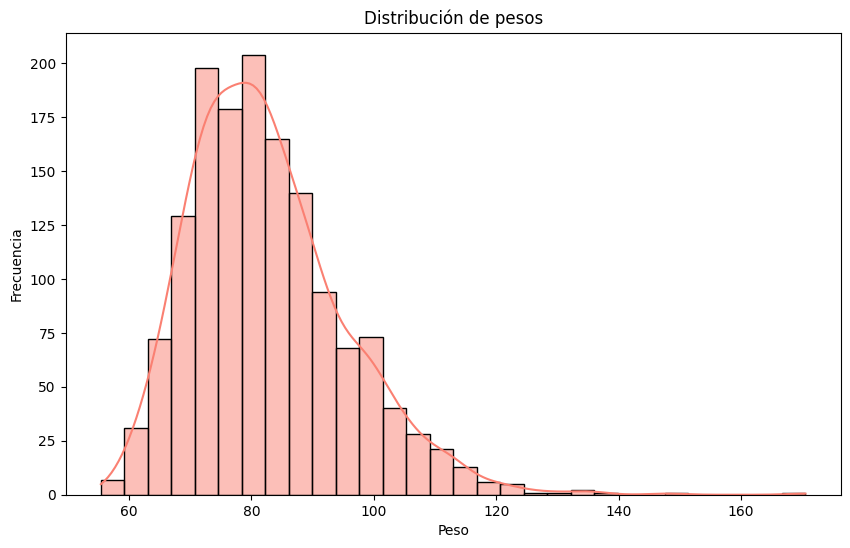

In [791]:
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=30, kde=True, color='salmon')
plt.title('Distribución de pesos')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

In [792]:
# Estadísticas básicas de 'weight'.
estadisticas2 = df['weight'].describe()

# Visualización de estadísticas.
print(estadisticas2)

count    1480.000000
mean       82.610378
std        12.765859
min        55.410000
25%        73.490000
50%        80.760000
75%        89.520000
max       170.520000
Name: weight, dtype: float64


Número de Observaciones (Count): Hay 1480 observaciones en la variable 'weight'. Esto indica el tamaño del conjunto de datos.

Media (Mean): La media es aproximadamente 82.61. Indica el valor promedio de la variable 'weight' en el conjunto de datos.

Desviación Estándar (Std): La desviación estándar es aproximadamente 12.77. Muestra la dispersión de los datos alrededor de la media. En este caso, la desviación estándar es moderada, indicando cierta variabilidad en los pesos.

Valor Mínimo y Máximo (Min y Max): El valor mínimo es 55.41 y el valor máximo es 170.52. Esto proporciona información sobre el rango de la variable.

Percentiles (25%, 50%, 75%): Estos son valores que dividen los datos en porcentajes. El percentil 25 (Q1) es 73.49, el percentil 50 (mediana o Q2) es 80.76, y el percentil 75 (Q3) es 89.52. Estos percentiles ayudan a comprender la distribución en términos de cuartiles.

Podemos concluir que la distribución de 'weight' tiene una media y mediana relativamente cercanas, lo que sugiere una forma de distribución simétrica o ligeramente sesgada. La desviación estándar moderada indica cierta variabilidad en los pesos.

La frecuencia con que aparecen los mismos días con los que se reservó con antelación.

In [793]:
# Calcular la frecuencia de la variable 'days_before'.
frecuencia = df['days_before'].value_counts()

# Crear una tabla con los resultados.
tabla_frecuencia = pd.DataFrame({'days_before': frecuencia.index, 'Frecuencia': frecuencia.values})

# Mostrar la tabla.
print(tabla_frecuencia)

   days_before  Frecuencia
0           10         290
1            2         197
2            8         190
3           12         177
4           14         170
5            4         153
6            6          70
7            7          37
8            3          31
9            5          27
10          11          25
11          13          25
12          15          24
13           9          23
14           1           8
15     10 days           6
16     14 days           3
17     12 days           3
18      6 days           3
19      4 days           3
20          16           3
21          17           3
22          20           1
23      2 days           1
24      5 days           1
25      7 days           1
26      8 days           1
27      1 days           1
28      3 days           1
29     13 days           1
30          29           1


Se ven ciertos problemas de formato como que en algunos aparece la palabra days. Se resuelve este problema con el siguiente código.

In [794]:
# Eliminar la palabra 'days' de la variable 'days_before'.
df['days_before'] = df['days_before'].str.replace(' days', '')

# Convertir la variable 'days_before' a tipo numérico.
df['days_before'] = pd.to_numeric(df['days_before'], errors='coerce')

# Calcular la frecuencia de la variable 'days_before' después de los cambios.
frecuencia = df['days_before'].value_counts()

# Crear una tabla con los resultados.
tabla_frecuencia = pd.DataFrame({'days_before': frecuencia.index, 'Frecuencia': frecuencia.values})

# Mostrar la tabla.
print(tabla_frecuencia)

    days_before  Frecuencia
0            10         296
1             2         198
2             8         191
3            12         180
4            14         173
5             4         156
6             6          73
7             7          38
8             3          32
9             5          28
10           13          26
11           11          25
12           15          24
13            9          23
14            1           9
15           16           3
16           17           3
17           20           1
18           29           1


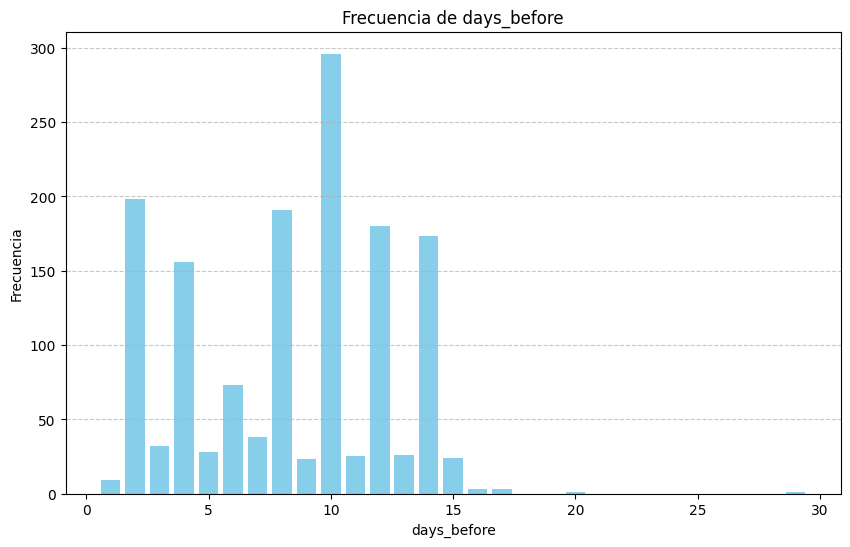

In [795]:
# Crear el gráfico de barras.
plt.figure(figsize=(10, 6))
plt.bar(tabla_frecuencia['days_before'], tabla_frecuencia['Frecuencia'], color='skyblue')
plt.title('Frecuencia de days_before')
plt.xlabel('days_before')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico.
plt.show()

In [796]:
# Estadísticas descriptivas para 'days_before'.
estadisticas_days_before = df['days_before'].describe()

# Imprimir las estadísticas.
print(estadisticas_days_before)

count    1480.000000
mean        8.356081
std         4.082097
min         1.000000
25%         4.000000
50%         9.000000
75%        12.000000
max        29.000000
Name: days_before, dtype: float64


Número de Observaciones (Count): Hay 1480 observaciones en la variable 'days_before'. Esto indica el tamaño del conjunto de datos.

Media (Mean): La media es aproximadamente 8.36. Indica el valor promedio de la variable 'days_before' en el conjunto de datos después de la transformación.

Desviación Estándar (Std): La desviación estándar es aproximadamente 4.08. Muestra la dispersión de los datos alrededor de la media. En este caso, la desviación estándar es moderada, indicando cierta variabilidad en los días antes del evento.

Valor Mínimo y Máximo (Min y Max): El valor mínimo es 1 y el valor máximo es 29. Esto proporciona información sobre el rango de la variable.

Percentiles (25%, 50%, 75%): Estos son valores que dividen los datos en porcentajes. El percentil 25 (Q1) es 4, el percentil 50 (mediana o Q2) es 9, y el percentil 75 (Q3) es 12. Estos percentiles ayudan a comprender la distribución en términos de cuartiles.

Podemos concluir que la distribución de 'days_before' tiene una mediana cercana a la media, lo que sugiere una forma de distribución simétrica. La desviación estándar moderada indica cierta variabilidad en los días antes del evento.

Para que los datos aún estén mucho mejor adaptados facilitando el entrenamiento de nuestro modelo se procede a normalizar las variables númericas, el peso, días de antelación de reserva y meses de membresía. De esta forma todas las variables quedan comprendidas en una escala unitaria.

No obstante, cabe recalcar que al normalizar dichas variables es importante que los datos que se vayan a utilizar en el test se normalicen en función de la escala de los valores de entrenamiento, se utilizan las medias y las desviaciones de los datos de entrenamiento para normalizar los de test.

Por tanto, antes debemos separar los datos de test y de entrenamiento, de todos los datos alrededor del 25% serán de test y los demás de entrenamiento.

In [797]:
import random

número = int(df.shape[0]*0.25) # 25% de los datos son de test.
print('El 25% de los datos serán de test, es decir:',número,'\n')
print('Número de datos de entrenamiento es de:',df.shape[0]-número,'\n')

# Generar un vector de n valores siendo n alrededor del 25% de los datos.
# Números enteros aleatorios entre 0 y 1479.
vector_sin_repeticion = random.sample(range(0, 1480), número)

# Convertir a enteros si se generan como flotantes.
# Índices de las filas a seleccionar.
indices_a_mover = [int(num) for num in vector_sin_repeticion]
df_test = df.iloc[indices_a_mover]  # Seleccionar las filas
dflabel_test = dflabel.iloc[indices_a_mover]  # Seleccionar las filas.

# Resetear el índice de filas del DataFrame.
df_test = df_test.reset_index(drop=True)
dflabel_test = dflabel_test.reset_index(drop=True)
df = df.reset_index(drop=True)
dflabel = dflabel.reset_index(drop=True)

# Eliminar las filas seleccionadas del DataFrame original.
df = df.drop(indices_a_mover)
dflabel = dflabel.drop(indices_a_mover)

El 25% de los datos serán de test, es decir: 370 

Número de datos de entrenamiento es de: 1110 



In [798]:
# Se procede a comprobar las dimensiones de ambos conjuntos de datos.

print(df_test.shape,',',dflabel_test.shape,'\n')
print(df.shape,',',dflabel.shape,'\n')


(370, 17) , (370,) 

(1110, 17) , (1110,) 



Se va a aplicar la normalización z-score, que consiste en restar la media de los datos y dividir por la desviación estándar.

In [799]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler.
scaler = StandardScaler()

# Normalizar los datos de entrenamiento.
df_normalized = scaler.fit_transform(df)

# Normalizar los datos de prueba utilizando la media y la desviación estándar
# aprendidas del conjunto de entrenamiento.
df_test_normalized = scaler.transform(df_test)

# Ahora, df_normalized y df_test_normalized contienen los datos normalizados.

Para combrobar que está bien normalizado, se debe observar si tienen una media cercana a cero y una desviación estándar cercana a uno.

In [800]:
# Calcular la media y desviación estándar de los datos de entrenamiento
# normalizados.
mean_train = df_normalized.mean(axis=0)
std_train = df_normalized.std(axis=0)

# Imprimir la media y desviación estándar de los datos de entrenamiento
# normalizados.
print("Media de los datos de entrenamiento normalizados:\n", mean_train)
print("\nDesviación estándar de los datos de entrenamiento normalizados:\n", std_train)

# Calcular la media y desviación estándar de los datos de prueba normalizados.
mean_test = df_test_normalized.mean(axis=0)
std_test = df_test_normalized.std(axis=0)

# Imprimir la media y desviación estándar de los datos de prueba normalizados.
print("\nMedia de los datos de prueba normalizados:\n", mean_test)
print("\nDesviación estándar de los datos de prueba normalizados:\n", std_test)

Media de los datos de entrenamiento normalizados:
 [ 6.08122161e-17 -1.60032148e-16 -2.72054651e-17  0.00000000e+00
 -2.72054651e-17  8.64173598e-17 -1.92038577e-17  9.60192886e-18
  3.36067510e-17  3.20064295e-18 -5.12102873e-17  0.00000000e+00
  3.20064295e-18 -3.04061081e-17 -4.96099658e-17  1.44028933e-17
  1.52030540e-17]

Desviación estándar de los datos de entrenamiento normalizados:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Media de los datos de prueba normalizados:
 [-0.13943703  0.0488922  -0.13595049 -0.00423751 -0.0066899   0.17557806
 -0.11256584 -0.05839294  0.01236076 -0.04240349  0.04821971  0.07455251
  0.04224979 -0.02900665 -0.04527611  0.01244814  0.05423234]

Desviación estándar de los datos de prueba normalizados:
 [0.76399341 0.938786   1.0502246  0.99736591 0.99508729 1.15759425
 0.87201009 0.93843447 1.01146975 0.95222154 1.07461058 1.36495049
 1.08509606 0.98296712 0.99436734 1.01172344 1.07495802]


Las medias de los datos de entrenamiento normalizados son cercanas a cero, lo cual es un indicativo de que la normalización se ha realizado correctamente.

Las desviaciones estándar de los datos de entrenamiento normalizados son todas muy cercanas a uno, lo cual es otro indicativo de que la normalización ha sido exitosa.

Las medias y desviaciones estándar de los datos de prueba normalizados también siguen patrones similares, lo cual es lo esperado cuando se normalizan los datos de prueba utilizando los parámetros (media y desviación estándar) aprendidos del conjunto de entrenamiento.

# Método

Una vez realizada la adaptación de los datos, ingeniería de datos, se procede a realizar el modelo. El objetivo es crear un modelo de aprendizaje automático que que sepa predecir con la precisión más alta posible si el cliente que ha hecho la reserva asistirá o no a la clase, lo más importante es conseguir que el modelo tenga buenos resultados con datos que no haya visto nunca, es decir, que generalice y no se sobreentrene.

El método que se utilizará es el de arquitectura de red neuronal. Al tratarse el problema de una clasificación binaria es una arquitectura que se puede adaptar bien al problema y que, además, a diferencia de otros modelos, puede resultar en una rápida convergencia.

El objetivo es empezar construyendo una red sencilla e ir haciendo diferentes cambios y adaptaciones para mejorar el modelo contruyendo cada vez una arquitectura más y más compleja que sepa encontrar con éxito patrones ocultos en nuestros datos.

Las redes neuronales son un modelo, arquitectura, inspirado en la estructura y funcionamiento del cerebro humano. Está compuesta por múltiples nodos interconectados, llamados neuronas, organizados en capas. Estas redes se utilizan para aprender representaciones complejas de los datos y realizar tareas de clasificación, regresión, agrupación, entre otras.  

En una red neuronal típica, hay tres tipos de capas:  

Capa de entrada (Input Layer): Recibe los datos de entrada y transmite esta información a la siguiente capa. Cada nodo en esta capa representa una característica o atributo del conjunto de datos.

Capas ocultas (Hidden Layers): Estas capas intermedias procesan la información de entrada mediante operaciones matriciales y aplicaciones de funciones de activación. Cada capa oculta realiza cálculos complejos para aprender representaciones más abstractas y significativas de los datos.

Capa de salida (Output Layer): Esta capa produce los resultados finales de la red neuronal. Dependiendo del tipo de tarea (clasificación, regresión, etc.), la capa de salida puede tener uno o varios nodos, cada uno correspondiendo a una clase, valor de regresión, o cualquier otra salida deseada. El aprendizaje en una red neuronal ocurre a través de un proceso llamado "entrenamiento". Durante el entrenamiento, el modelo ajusta los pesos y sesgos de sus conexiones para minimizar la diferencia entre las salidas predichas y las salidas reales, utilizando técnicas como el descenso del gradiente y la retropropagación.

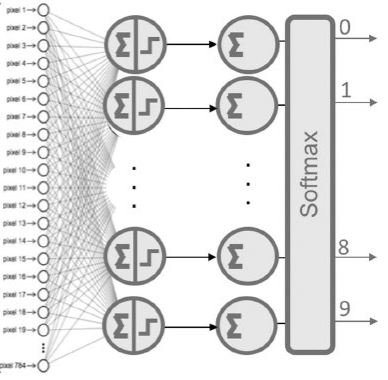

En la anterior imagen se representa de forma sencilla la arquitectura de una red neuronal, donde en la última capa se puede ver la llamada función de activación softmax. Hay numerosas funciones de activación que se utilizan en cada capa, esta la relu, tanh, softmax... entre otras. Resulta que en función del problema a resolver y la arquitectura del modelo es conveniente utilizar un tipo u otro de función de activación.

La función de activación de la capa de salida representada en la anterior imagen es softmax que se utiliza para en los casos de clasificación multiclase ya que permite crear un vector de distribuciones de probabilidad de los resultados obtenidos en el modelo pudiendo otorgar cierta probabilidad de pertenecer o no a cada una de las clases estudiadas. Es una función que se utiliza en los problemas en los que se requiera clasificar los datos en más de dos tipos de clase.

Para nuestro caso, que es una clasificación binaria, utilizaremos la siguiente función en la capa de salida, la función sigmoide.

La función sigmoide es comúnmente utilizada en problemas de clasificación binaria y en capas de salida de modelos de redes neuronales cuando se busca realizar una predicción de probabilidad. La función sigmoide produce valores en el rango de 0 a 1, lo que la hace útil para interpretar la salida como la probabilidad de que un ejemplo pertenezca a una clase específica.

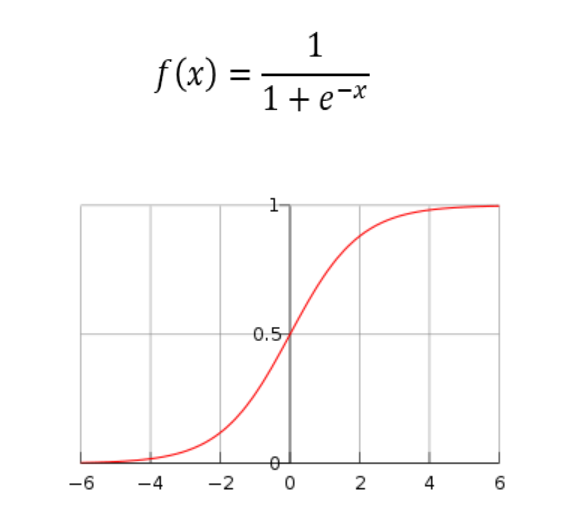

En la fase de predicción, a menudo se establece un umbral, por ejemplo, 0.5, y si la salida de la función sigmoide es mayor que ese umbral, se clasifica como la clase positiva, y si es menor, se clasifica como la clase negativa.

Por otro lado, hay una función de pérdida que se utiliza para ver cuán incorrectos son los resultados por el modelo con respecto a los reales, este dato se utilizará posteriormente para el reajuste de pesos de las neuronas para que cada vez el error sea el mínimo. Hay dos tipos principales de funciones de pérdida para arquitecturas de redes neuronales, aquellas que se utilizan para problemas de regresión como el mse y otras que se utilizan para problemas de clasificación como la entropía cruzada y para nuestro caso, la entropía binaria cruzada. Es una medida de distancia entre los resultados del modelo y los reales.

Por último, el optimizador determinará como se utilizarán esos resultados del error para variar el valor de los pesos de forma que el error cada vez sea mínimo. El optimizador rmsprop se usa comúnmente en la mayoría de este tipo de problemas.


# Opción 1:
Se realiza un modelo sencillo con los datos que se tiene.

In [801]:
# Primer modelo.

# El tipo de red será secuencial.
# Desde la entrada hasta la salida sin ciclos.
network = models.Sequential()

# Las capas serán del tipo dense, es decir, la conexión entre cada valor de
# entada o cada neurona se hace con cada neurona de la siguiente capa, es una
# relación de todos con todos. De esta manera cada neurona ve todos los datos y
# cada neurona trabaja con cada neurona.

# La entrada de los datos tiene una dimensión de 17 ya que cada dato tiene 17
# características.
network.add(layers.Dense(64, activation='relu', input_shape=(17,)))

network.add(layers.Dense(10, activation='relu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

network.compile(optimizer='rmsprop', # Optimizador.
                loss='binary_crossentropy', # Función de pérdida.
                metrics=['accuracy']) # Medida de precisión.

resultados = network.fit(df_normalized, dflabel,
            epochs=20,
            batch_size=50,
            validation_data=(df_test_normalized, dflabel_test)) # Validación.

Model: "sequential_183"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_553 (Dense)           (None, 64)                1152      
                                                                 
 dense_554 (Dense)           (None, 10)                650       
                                                                 
 dense_555 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1813 (7.08 KB)
Trainable params: 1813 (7.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 1s 16ms/step - loss: 0.6589 - accuracy: 0.6225 - val_loss: 0.5695 - val_accuracy: 0.7324
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.5692 - accuracy: 0.7180 - val_loss: 0.5225 - val_accuracy: 0.7459
Epo

Con un primer modelo básico se consigue cerca de un 78% de precisión en los datos de validación. Comprobaremos acontinuación si equilibrando los datos de entrenamiento para que tengan el mismo número de de clientes que asisten y que no asisten eliminando parte de los que superan en número a los otros, es decir, eliminaremos datos de los clientes que no asisten, mejora el modelo.

In [802]:
from sklearn.metrics import confusion_matrix, classification_report

y_prob = network.predict(df_test_normalized)

# Como es una clasificaación binaria se establece un umbral de 0.5
y_pred = (y_prob > 0.5).astype(int)

# Se calcula la matriz de confusión
conf_matrix = confusion_matrix(dflabel_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)

# Se calcula e imprime el reporte de clasificación
report = classification_report(dflabel_test, y_pred)
print("Reporte de Clasificación:")
print(report)

12/12 [==============================] - 0s 2ms/step
Matriz de Confusión:
[[253  17]
 [ 59  41]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       270
           1       0.71      0.41      0.52       100

    accuracy                           0.79       370
   macro avg       0.76      0.67      0.69       370
weighted avg       0.78      0.79      0.77       370



En la **matriz de confusión**: La diagonal principal (de arriba a la izquierda a abajo a la derecha) representa las predicciones correctas. El lado superior derecho contiene los falsos positivos. El lado inferior izquierdo contiene los falsos negativos.

La **precisión** es la proporción de verdaderos positivos respecto a todos los ejemplos predichos como positivos.

 La **sensibilidad** es la proporción de verdaderos positivos respecto a todos los ejemplos que son realmente positivos.

 **F1-Score** es una medida que combina precisión y sensibilidad en un solo número. Cuanto más cercano a 1, mejor es el rendimiento.

 **Support** es el número de instancias reales en cada clase.

 **Accuracy** es la proporción de predicciones correctas respecto al total de instancias.

 **Macro Avg** es el promedio simple de precision, recall y f1-score para ambas clases.

 **Weighted Avg** es el promedio ponderado por el número de instancias en cada clase.

#  Opción 2:
Eliminación de parte de los datos para que estos estén equilibrados.

In [803]:
conteo_valores = dflabel.value_counts()
print(f"Valores únicos para la etiqueta antes:\n{conteo_valores}\n")
N = conteo_valores[0]-conteo_valores[1]
print('Reservas de clientes que no asisten a eliminar para equilibrar los',
      'datos:',N,'\n')

Valores únicos para la etiqueta antes:
0    761
1    349
Name: attended, dtype: int64

Reservas de clientes que no asisten a eliminar para equilibrar los datos: 412 



In [804]:
# Eliminación de reservas:

# Encontrar índices de filas que contienen solo ceros
indices_filas_ceros = dflabel.index[dflabel.iloc[:] == 0].tolist()

# Seleccionar aleatoriamente el número específico de filas a eliminar
filas_a_eliminar = np.random.choice(indices_filas_ceros, N, replace=False)

# Eliminar las filas seleccionadas aleatoriamente del DataFrame
df1 = df.drop(filas_a_eliminar)
dflabel1 = dflabel.drop(filas_a_eliminar)

conteo_valores = dflabel1.value_counts().to_string()
print(f"Valores únicos para la etiqueta después:\n{conteo_valores}\n")

Valores únicos para la etiqueta después:
0    349
1    349



Seguimos arreglando el desequilibrio ahora en los datos de test.

In [805]:
conteo_valores = dflabel_test.value_counts()
print(f"Valores únicos para la etiqueta antes:\n{conteo_valores}\n")
N = conteo_valores[0]-conteo_valores[1]
print('Reservas de clientes que no asisten a eliminar para equilibrar los',
      'datos:',N,'\n')

# Eliminación de reservas:

# Encontrar índices de filas que contienen solo ceros
indices_filas_ceros = dflabel_test.index[dflabel_test.iloc[:] == 0].tolist()

# Seleccionar aleatoriamente el número específico de filas a eliminar
filas_a_eliminar = np.random.choice(indices_filas_ceros, N, replace=False)

# Eliminar las filas seleccionadas aleatoriamente del DataFrame
df1_test = df_test.drop(filas_a_eliminar)
dflabel1_test = dflabel_test.drop(filas_a_eliminar)

conteo_valores = dflabel1_test.value_counts().to_string()
print(f"Valores únicos para la etiqueta después:\n{conteo_valores}\n")

Valores únicos para la etiqueta antes:
0    270
1    100
Name: attended, dtype: int64

Reservas de clientes que no asisten a eliminar para equilibrar los datos: 170 

Valores únicos para la etiqueta después:
0    100
1    100



In [806]:
# Normalizamos los nuevos datos.

# Crear un objeto StandardScaler.
scaler = StandardScaler()

# Normalizar los datos de entrenamiento.
df1_normalized = scaler.fit_transform(df1)

# Normalizar los datos de prueba utilizando la media y la desviación estándar
# aprendidas del conjunto de entrenamiento.
df1_test_normalized = scaler.transform(df1_test)

# Ahora, df_normalized y df_test_normalized contienen los datos normalizados.

In [807]:
# Primer modelo.

# El tipo de red será secuencial.
# Desde la entrada hasta la salida sin ciclos.
network = models.Sequential()

# Las capas serán del tipo dense, es decir, la conexión entre cada valor de
# entada o cada neurona se hace con cada neurona de la siguiente capa, es una
# relación de todos con todos. De esta manera cada neurona ve todos los datos y
# cada neurona trabaja con cada neurona.

# La entrada de los datos tiene una dimensión de 17 ya que cada dato tiene 17
# características.
network.add(layers.Dense(64, activation='relu', input_shape=(17,)))

network.add(layers.Dense(10, activation='relu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

network.compile(optimizer='rmsprop', # Optimizador.
                loss='binary_crossentropy', # Función de pérdida.
                metrics=['accuracy']) # Medida de precisión.

resultados = network.fit(df1_normalized, dflabel1,
            epochs=20,
            batch_size=35,
            validation_data=(df1_test_normalized, dflabel1_test)) # Validación.

Model: "sequential_184"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_556 (Dense)           (None, 64)                1152      
                                                                 
 dense_557 (Dense)           (None, 10)                650       
                                                                 
 dense_558 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1813 (7.08 KB)
Trainable params: 1813 (7.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
20/20 [==============================] - 1s 15ms/step - loss: 0.6865 - accuracy: 0.5444 - val_loss: 0.6547 - val_accuracy: 0.6850
Epoch 2/20
20/20 [==============================] - 0s 6ms/step - loss: 0.6474 - accuracy: 0.6590 - val_loss: 0.6289 - val_accuracy: 0.6900
Epo

La precisión no aumenta si eliminamos algunos datos para que se equilibren el número de ambos resultados lo cual tiene sentido ya que se han eliminado un total de 582 datos, un (582/1480)*100 = 39% menos de datos. Ello no enriquece al modelo para que pueda ver suficientes ejemplos y se enriquezca detectando patrones ocultos, además, teniendo en cuenta que cada reserva tiene un total de 17 características que a pesar de ser la mayoría binarias sigue siendo un número importante que dificulta el aprendizaje si no se tienen muchos datos.

# Opción 3:
Utilización del método de aumento de datos para equilibrar la clase minoritaria, la de que los clientes asisten, con la clase mayoritaría, los clientes no asisten.

Una manera de abordar este problema implica aumentar la cantidad de ejemplos en la clase minoritaria. Esto se logra al duplicar los ejemplos de esa clase en el conjunto de entrenamiento antes de entrenar un modelo. Aunque esto equilibra la distribución de clases, no aporta información adicional al modelo.

Una mejora consiste en generar nuevos ejemplos a partir de la clase minoritaria. Una de las técnicas más conocidas para generar estos ejemplos se llama SMOTE (Técnica de Sobremuestreo Sintético de la Clase Minoritaria). Fue propuesta por Nitesh Chawla y otros en un artículo del 2002 llamado "SMOTE: Técnica de Sobremuestreo Sintético de la Clase Minoritaria".

Para SMOTE, el proceso comienza seleccionando aleatoriamente una instancia de la clase minoritaria y encuentra sus k vecinos más cercanos dentro de la misma clase. Luego, para generar una nueva instancia artificial, elige uno de esos vecinos más cercanos al azar y establece una conexión entre el punto original y este vecino. Este proceso crea un nuevo punto en el espacio de características, generándolo como una mezcla ponderada entre las dos instancias seleccionadas.

In [808]:
# Se lama a la biblioteca Imbalanced-Learn, contiene la función SMOTE.
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

oversample = SMOTE() # Operador SMOTE.

# Generación de datos nuevos mediante aproximacines a los datos de la clase
# minoritaria.
df, dflabel = oversample.fit_resample(df, dflabel)
df_test, dflabel_test = oversample.fit_resample(df_test, dflabel_test)

0.10.1


Se comprueba la generación y, por tanto, el equilibrio.

In [809]:
conteo_valores = dflabel.value_counts()
print(f"Valores únicos para la etiqueta en datos de entrenamiento:\n{conteo_valores}\n")

conteo_valores = dflabel_test.value_counts()
print(f"Valores únicos para la etiqueta en datos de test:\n{conteo_valores}\n")

Valores únicos para la etiqueta en datos de entrenamiento:
0    761
1    761
Name: attended, dtype: int64

Valores únicos para la etiqueta en datos de test:
0    270
1    270
Name: attended, dtype: int64



Mismo número de ocurrencias, están equilibrados los datos. Se procede a comprobar si gracias a la generación de nuevos datos a partir de los orginales añaden suficiente riqueza y variabilidad como para que el modelo se entrene y generalice.

In [810]:
# Normalizamos los nuevos datos.

# Crear un objeto StandardScaler.
scaler = StandardScaler()

# Normalizar los datos de entrenamiento.
df_normalized = scaler.fit_transform(df)

# Normalizar los datos de prueba utilizando la media y la desviación estándar
# aprendidas del conjunto de entrenamiento.
df_test_normalized = scaler.transform(df_test)

# Ahora, df_normalized y df_test_normalized contienen los datos normalizados.

In [811]:
# Primer modelo.

# El tipo de red será secuencial.
# Desde la entrada hasta la salida sin ciclos.
network = models.Sequential()

# Las capas serán del tipo dense, es decir, la conexión entre cada valor de
# entada o cada neurona se hace con cada neurona de la siguiente capa, es una
# relación de todos con todos. De esta manera cada neurona ve todos los datos y
# cada neurona trabaja con cada neurona.

# La entrada de los datos tiene una dimensión de 17 ya que cada dato tiene 17
# características.
network.add(layers.Dense(64, activation='relu', input_shape=(17,)))

network.add(layers.Dense(10, activation='relu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

network.compile(optimizer='rmsprop', # Optimizador.
                loss='binary_crossentropy', # Función de pérdida.
                metrics=['accuracy']) # Medida de precisión.

resultados = network.fit(df_normalized, dflabel,
            epochs=20,
            batch_size=68,
            validation_data=(df_test_normalized, dflabel_test)) # Validación.

Model: "sequential_185"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_559 (Dense)           (None, 64)                1152      
                                                                 
 dense_560 (Dense)           (None, 10)                650       
                                                                 
 dense_561 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1813 (7.08 KB)
Trainable params: 1813 (7.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 1s 14ms/step - loss: 0.6571 - accuracy: 0.6235 - val_loss: 0.5853 - val_accuracy: 0.7796
Epoch 2/20
23/23 [==============================] - 0s 7ms/step - loss: 0.5457 - accuracy: 0.7562 - val_loss: 0.5004 - val_accuracy: 0.8222
Epo

Efectivamente, el modelo mejora con respecto a las otras dos opciones gracias a esta idea de generar datos nuevos para que estos queden balanceados. Superando el 80% de acierto en algunas ejecuciones.

Una vez ya realizado todo tipo de adaptaciones a los datos se procede a mejorar la arquitectura del modelo en sí con el objetivo de tener mejores probabilidades de acierto.

Se añaden reguladores de tipo dropout para evitar el oveftting.

Los regularizadores L2 y Dropout son técnicas comunes utilizadas para evitar el overfitting y mejorar la generalización del modelo. L2 agrega una penalización a la magnitud de los pesos en la función de pérdida. El objetivo es limitar la magnitud total de los pesos, lo que ayuda a prevenir que algunos pesos se vuelvan muy grandes. Dropout, en cambio, durante el entrenamiento aleatoriamente "apaga" un porcentaje de las neuronas en cada capa. El objetivo es evitar la dependencia excesiva de ciertas neuronas y mejorar la robustez general del modelo.

In [812]:
# Segundo modelo.

from keras.layers import Dropout

# El tipo de red será secuencial.
# Desde la entrada hasta la salida sin ciclos.
network = models.Sequential()

# Las capas serán del tipo dense, es decir, la conexión entre cada valor de
# entada o cada neurona se hace con cada neurona de la siguiente capa, es una
# relación de todos con todos. De esta manera cada neurona ve todos los datos y
# cada neurona trabaja con cada neurona.

# La entrada de los datos tiene una dimensión de 17 ya que cada dato tiene 17
# características.
network.add(layers.Dense(64, activation='relu', input_shape=(17,)))
network.add(Dropout(0.20))
network.add(layers.Dense(10, activation='relu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

resultados = network.fit(df_normalized, dflabel,
            epochs=20,
            batch_size=68,
            validation_data=(df_test_normalized, dflabel_test)) # Validación.

Epoch 1/20
23/23 [==============================] - 2s 22ms/step - loss: 0.6660 - accuracy: 0.6045 - val_loss: 0.6164 - val_accuracy: 0.7556
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.6006 - accuracy: 0.7227 - val_loss: 0.5585 - val_accuracy: 0.7815
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.5546 - accuracy: 0.7457 - val_loss: 0.5065 - val_accuracy: 0.7981
Epoch 4/20
23/23 [==============================] - 0s 10ms/step - loss: 0.5090 - accuracy: 0.7733 - val_loss: 0.4683 - val_accuracy: 0.8130
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.4713 - accuracy: 0.7989 - val_loss: 0.4376 - val_accuracy: 0.8259
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 0.4610 - accuracy: 0.7983 - val_loss: 0.4221 - val_accuracy: 0.8370
Epoch 7/20
23/23 [==============================] - 0s 10ms/step - loss: 0.4531 - accuracy: 0.7865 - val_loss: 0.4065 - val_accuracy: 0.8463
Epoch 8/20
23/23 

El modelo no consigue mejores resultados.

Ahora se va a probar el primer modelo cambiando el batchsize por uno más pequeño

In [813]:
# Tercer modelo.

network = models.Sequential()

network.add(layers.Dense(64, activation='relu', input_shape=(17,)))
network.add(layers.Dense(10, activation='relu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop', # Optimizador.
                loss='binary_crossentropy', # Función de pérdida.
                metrics=['accuracy']) # Medida de precisión.

resultados = network.fit(df_normalized, dflabel,
            epochs=20,
            batch_size=32,
            validation_data=(df_test_normalized, dflabel_test)) # Validación.

Epoch 1/20
48/48 [==============================] - 1s 9ms/step - loss: 0.6087 - accuracy: 0.6787 - val_loss: 0.5462 - val_accuracy: 0.7741
Epoch 2/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5154 - accuracy: 0.7746 - val_loss: 0.4759 - val_accuracy: 0.8019
Epoch 3/20
48/48 [==============================] - 0s 5ms/step - loss: 0.4624 - accuracy: 0.7957 - val_loss: 0.4272 - val_accuracy: 0.8426
Epoch 4/20
48/48 [==============================] - 0s 5ms/step - loss: 0.4326 - accuracy: 0.8042 - val_loss: 0.4019 - val_accuracy: 0.8537
Epoch 5/20
48/48 [==============================] - 0s 4ms/step - loss: 0.4122 - accuracy: 0.8160 - val_loss: 0.3932 - val_accuracy: 0.8407
Epoch 6/20
48/48 [==============================] - 0s 4ms/step - loss: 0.4001 - accuracy: 0.8160 - val_loss: 0.3796 - val_accuracy: 0.8519
Epoch 7/20
48/48 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.8259 - val_loss: 0.3759 - val_accuracy: 0.8500
Epoch 8/20
48/48 [==

Resultados muy similares que también se dan con un batchsize mayor, como se puede observar en el siguiente ejemplo.

In [814]:
# Cuarto modelo.

network = models.Sequential()

network.add(layers.Dense(64, activation='relu', input_shape=(17,)))
network.add(layers.Dense(10, activation='relu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

network.compile(optimizer='rmsprop', # Optimizador.
                loss='binary_crossentropy', # Función de pérdida.
                metrics=['accuracy']) # Medida de precisión.

resultados = network.fit(df_normalized, dflabel,
            epochs=20,
            batch_size=128,
            validation_data=(df_test_normalized, dflabel_test)) # Validación.

Model: "sequential_188"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_568 (Dense)           (None, 64)                1152      
                                                                 
 dense_569 (Dense)           (None, 10)                650       
                                                                 
 dense_570 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1813 (7.08 KB)
Trainable params: 1813 (7.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - 1s 38ms/step - loss: 0.6723 - accuracy: 0.5683 - val_loss: 0.6128 - val_accuracy: 0.7185
Epoch 2/20
12/12 [==============================] - 0s 11ms/step - loss: 0.6192 - accuracy: 0.6892 - val_loss: 0.5695 - val_accuracy: 0.7815
Ep

Se prueba a cambiar la función de activación y el optimizador. Ahora se va a emplear ELU como función de activación y Adam como optimizador.

In [815]:
# Quinto modelo.

network = models.Sequential()

network.add(layers.Dense(64, activation='elu', input_shape=(17,)))
network.add(layers.Dense(10, activation='elu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='adam', # Optimizador.
                loss='binary_crossentropy', # Función de pérdida.
                metrics=['accuracy']) # Medida de precisión.

resultados = network.fit(df_normalized, dflabel,
            epochs=20,
            batch_size=68,
            validation_data=(df_test_normalized, dflabel_test)) # Validación.

Epoch 1/20
23/23 [==============================] - 1s 15ms/step - loss: 0.7274 - accuracy: 0.5788 - val_loss: 0.5767 - val_accuracy: 0.7333
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.5517 - accuracy: 0.7411 - val_loss: 0.4848 - val_accuracy: 0.8222
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 0.4861 - accuracy: 0.7825 - val_loss: 0.4394 - val_accuracy: 0.8185
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4515 - accuracy: 0.7989 - val_loss: 0.4151 - val_accuracy: 0.8426
Epoch 5/20
23/23 [==============================] - 0s 5ms/step - loss: 0.4334 - accuracy: 0.8068 - val_loss: 0.3839 - val_accuracy: 0.8519
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4196 - accuracy: 0.8114 - val_loss: 0.3782 - val_accuracy: 0.8574
Epoch 7/20
23/23 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8095 - val_loss: 0.3712 - val_accuracy: 0.8556
Epoch 8/20
23/23 [=

Al haber realizado los anteriores cambios es visible un convergencia más rápida ya que a partir de la tercera época consigue resultados de precisión cercanos al 80% además de una mejora en la precisión llegando en algunas ejecuaciones al 86% de precisión en el test.

De esta froma utilizaremos las funciones de activación elu y el optimizador Adam añdiendo regularización L2 en los pesos con un término de regularización de 0.1. Como con los regularizadores se evitan sobreentrenamientos relizaremos más épocas de esta froma comprobar cuánto generaliza nuestro modelo y a qué precisión puede llegar con los datos de test.

In [816]:
# Sexto modelo.

network = models.Sequential()

from tensorflow.keras import regularizers

network.add(layers.Dense(64, activation='elu', kernel_initializer='random_normal', input_shape=(17,), kernel_regularizer=regularizers.l2(0.1)))

network.add(layers.Dense(10, activation='elu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='adam', # Optimizador.
                loss='binary_crossentropy', # Función de pérdida.
                metrics=['accuracy']) # Medida de precisión.

resultados = network.fit(df_normalized, dflabel,
            epochs=50,
            batch_size=68,
            validation_data=(df_test_normalized, dflabel_test)) # Validación.

Epoch 1/50
23/23 [==============================] - 1s 15ms/step - loss: 0.8098 - accuracy: 0.7681 - val_loss: 0.6926 - val_accuracy: 0.7944
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6555 - accuracy: 0.7825 - val_loss: 0.5759 - val_accuracy: 0.8167
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5737 - accuracy: 0.7911 - val_loss: 0.5219 - val_accuracy: 0.8370
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5288 - accuracy: 0.8016 - val_loss: 0.4815 - val_accuracy: 0.8444
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4984 - accuracy: 0.8081 - val_loss: 0.4489 - val_accuracy: 0.8574
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4808 - accuracy: 0.8029 - val_loss: 0.4331 - val_accuracy: 0.8519
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4720 - accuracy: 0.8009 - val_loss: 0.4170 - val_accuracy: 0.8481
Epoch 8/50
23/23 [=

En algunas épocas el modelo alcanza una precisión en la validación del 84%, pero no hay una mejora sustancial con el quinto modelo.

Se han probado varias inicializaciones de pesos y reguladores.

In [817]:
# Séptimo modelo.

network = models.Sequential()

from tensorflow.keras import regularizers

network.add(layers.Dense(64, activation='elu', kernel_initializer='GlorotUniform', input_shape=(17,), kernel_regularizer=regularizers.l2(0.1)))

network.add(layers.Dense(10, activation='elu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

network.compile(optimizer='adam', # Optimizador.
                loss='binary_crossentropy', # Función de pérdida.
                metrics=['accuracy']) # Medida de precisión.

resultados = network.fit(df_normalized, dflabel,
            epochs=50,
            batch_size=68,
            validation_data=(df_test_normalized, dflabel_test)) # Validación.

Model: "sequential_191"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_577 (Dense)           (None, 64)                1152      
                                                                 
 dense_578 (Dense)           (None, 10)                650       
                                                                 
 dense_579 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1813 (7.08 KB)
Trainable params: 1813 (7.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
23/23 [==============================] - 1s 14ms/step - loss: 3.1905 - accuracy: 0.5191 - val_loss: 2.8038 - val_accuracy: 0.6796
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 2.5357 - accuracy: 0.7201 - val_loss: 2.2517 - val_accuracy: 0.7574
Epo

No mejora significativamente este anterior modelo al quinto.

Se va a explicar la mejora que da el modelo gracias, principalmente, a la función de activación Elu y el optimizador adam.


La función de activación Elu vs Relu. La función ELU está definida como la función exponencial para valores positivos y lineal para valores negativos.
Para valores negativos, la función ELU tiene una pendiente ligeramente menor que la de ReLU, lo que puede ayudar a aliviar el problema del "dying ReLU". Este problema puede ocurrir cuando el valor de entrada a una neurona ReLU es negativo y durante el proceso de entrenamiento, la derivada de la función ReLU para ese valor es cero. Como la derivada es cero para valores negativos, la neurona ya no puede actualizar sus pesos, lo que resulta en que permanezca inactiva para todas las entradas futuras con valores negativos. Esto significa que la neurona no está aprendiendo y no contribuye a la capacidad de la red neuronal para modelar el problema.

A diferencia de ReLU, la función ELU no se limita a cero para valores negativos, lo que puede permitir que las neuronas sigan aprendiendo incluso para valores negativos de entrada.

Mientras ReLU es más comúnmente utilizada y tiene una forma simple y eficiente, ELU ofrece una alternativa que puede mitigar algunos de los problemas asociados con ReLU, como las neuronas inactivas.

Función Relu:

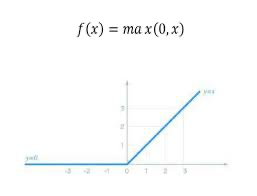

Función Elu:

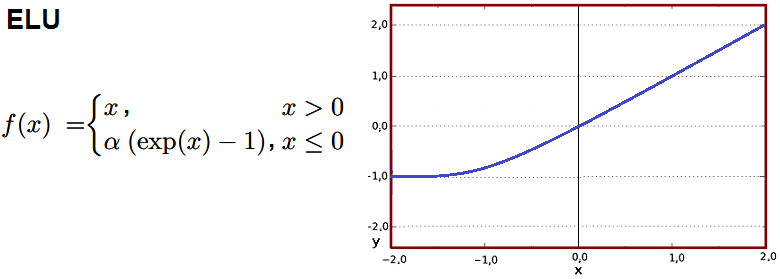


El optimizador Adam vs rmsprop. Adam combina conceptos de RMSprop con el método del momento (momentum) en un solo algoritmo de optimización. Además de adaptar la tasa de aprendizaje para cada parámetro como RMSprop, Adam también utiliza el concepto de momentum para mantener un promedio móvil de los gradientes anteriores. Incorpora dos momentos, el momento del primer orden que es similar al de RMSprop (utiliza gradientes) y el momento del segundo orden que actúa como una corrección al primer momento (utiliza gradientes al cuadrado).

Adam generalmente funciona bien en una variedad de configuraciones y problemas de optimización debido a su combinación de adaptabilidad de la tasa de aprendizaje y el uso de momentos.

Acontinuación, se profundiza en el mejor modelo, el quinto, lo que se va a mirar es cuándo empieza a sobreentrenar, en qué época alcanza la mejor precisión en la validación.

In [818]:
# Quinto modelo. Sin regularizadores.

network = models.Sequential()

network.add(layers.Dense(64, activation='elu', input_shape=(17,)))

network.add(layers.Dense(10, activation='elu'))

# Última capa con la función sigmoid.
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='adam', # Optimizador.
                loss='binary_crossentropy', # Función de pérdida.
                metrics=['accuracy']) # Medida de precisión.

resultados = network.fit(df_normalized, dflabel,
            epochs=50,
            batch_size=68,
            validation_data=(df_test_normalized, dflabel_test)) # Validación.

Epoch 1/50
23/23 [==============================] - 2s 21ms/step - loss: 0.6810 - accuracy: 0.6117 - val_loss: 0.5503 - val_accuracy: 0.7796
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5235 - accuracy: 0.7549 - val_loss: 0.4656 - val_accuracy: 0.8056
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4668 - accuracy: 0.7891 - val_loss: 0.4249 - val_accuracy: 0.8278
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4415 - accuracy: 0.7917 - val_loss: 0.3999 - val_accuracy: 0.8389
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4249 - accuracy: 0.8022 - val_loss: 0.3849 - val_accuracy: 0.8481
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4145 - accuracy: 0.8068 - val_loss: 0.3747 - val_accuracy: 0.8463
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4083 - accuracy: 0.8029 - val_loss: 0.3732 - val_accuracy: 0.8519
Epoch 8/50
23/23 [=

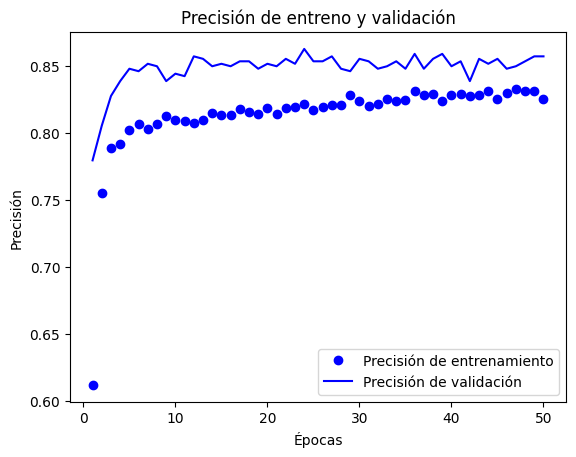

In [819]:
import matplotlib.pyplot as plt

acc = resultados.history['accuracy']
val_acc = resultados.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

Resulta que haciendo algunas pruebas hemos visto que no hace falta añadir ningún tipo de regulador ya que el modelo no llega a sobreentrenar, el modelo es uno más sencillo.

El por qué de este posible no sobreentrenamiento puede ser debido a que el conjunto de datos de entrenamiento tenga una suficiente variabilidad como para que el modelo generalice en las épocas en las que se entrena. Ello resulta en un modelo mucho más sencillo.

El modelo en algunas iteraciones alcanza precisiones de más del 85% de acierto en la validación. Además, en el gráfico anterior se puede ver como a medida que aumenta el número de épocas la precisión en la validación no disminuye ni aumenta oscila entre rangos del 83% a más del 85%.

Un 85% de precisión es un resultado aceptable para nuestro problema ya que hay que tener en cuenta que cada reserva tiene 17 características y que el número de datos de entrenamiento habiendo hecho el aumento de datos para que estos estén equilibrados es de 1522. Por tanto, es aceptable una incertidumbre del 15% conociendo el contexto del problema que no plantea circunstancias de vida o muerte.

# Hallazgos

Resulta que los datos obtenidos en la base de datos estaban desequilibrados en relación al número de asistencias, probando diferentes opciones se demostró que la que mejor funcionaba para un avance en la convergencia del modelo era realizar un aumento de datos mediante el método SMOTE.

Posteriormente, del modelo sencillo se decidió utilizar otro tipo de funciones de activación, en vez de relu la elu, y otro optimizador, en vez de rmsprop el adam, que desmotró dar mejores resultados subiendo la precisión en una media de 5%.

Por último, después de numerosas pruebas usando reguladores, dropout y l2, nos dimos cuenta de que enrealidad el modelo no llegaba a sobreentrenar y que añadiendo reguladores el modelo o no mejoraba sustancialmente o perdia precisión con respecto al modelo sin el uso de los mismos

En resumen, lo más importante del problema era adaptar bien los datos, su codificación, normalización, eliminación de datos innecesarios y el aumento de algunos de ellos mediante el método SMOTE. Una vez hecho éstos, el modelo ya alcanzaba precisiones del 80% sin necesidad de dificultar su arquitectura y casi sin overfitting.

# Trabajo futuro

Lo que es el modelo se podría mejorar estudiando y cambiando hiperparámetros, ingeniería de características o analizando errores que se podrían haber pasado por alto. Ahora se van a explicar propuestas interesantes para un futuro.

Una muy buena idea sería desarrollar una Interfaz de Usuario. Se podría utilizar un framework sencillo como Flask, o alguno más complejo como Streamlit o Dash. El objetivo principal sería hacer una interfaz intuitiva para que el personal del gimnasio la pueda utilizar fácilmente, pudiendo interactuar sin la necesidad de tener conocimiento técnico sobre el tema. El personal podría ingresar los datos de una reserva (variables vistas en el proyecto) y obtener la predicción del modelo que concluya si la persona asistirá realmente o no. También se proporcionarían indicadores visuales o estadísticas para que se puedan comprender mejor las predicciones.

Otro tema que daría mucho juego sería la expansión del gimnasio. Habría que estudiar si estas predicciones se podrían a hacer a una escala mayor y qué implicaría si por ejemplo este gimnasio es una franquicia que pretende llegar a muchas ciudades y quién sabe si a otros países.

Recopilar más datos seguro que sería algo positivo. Se podrían añadir más variables al modelo de predicción o hacerlas más específicas. Por ejemplo, la hora que es AM o PM podría ser en una cifra determinada (no hace falta tener en cuenta los minutos, pero alomejor en intervalos de una hora si).

Habría que conseguir un modelo que pueda ser utilizado de forma continua y automatizada. Configurar notificaciones para el personal del gimnasio teniendo en cuenta las predicciones del modelo. También algo obvio que no ha sido mencionado hasta ahora, sería de gran ayuda una mejor comunicación entre los clientes del gimnasio y los trabajadores.

Finalmente, se podría enfocar una de las mayores procupaciones del gimnasio: el ámbito económico. Se debería estudiar y analizar la rentabilidad del gimnasio en relación con el modelo predictivo. Se entra en un amplio estudio con el que se reflexionaría sobre el coste del gimnasio (que pagan los clientes), la limpieza del local, los monitores y personal, sueldos y todo lo que se quiera tener en cuenta. Debe haber un equilibrio y que clientes y personal estén satisfechos con su situación.

# Bibliografía

- colaboradores de Wikipedia. (2024, 6 enero). Red neuronal artificial. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Red_neuronal_artificial

- Qué es una red neuronal? - Explicación de las redes neuronales artificiales - AWS. (s. f.). Amazon Web Services, Inc. https://aws.amazon.com/es/what-is/neural-network/

- González-Ruiz, S., Gómez-Gallego, I., Pastrana-Brincones, J. L., & Mendo, A. H. (2015). Algoritmos de clasificación y redes neuronales en la observación automatizada de registros. Cuadernos de psicología del deporte, 15(1), 31-40. https://doi.org/10.4321/s1578-84232015000100003

- Team, K. (s. f.). Keras Documentation: Developer Guides. https://keras.io/guides/

- Stack Overflow - where developers learn, share, & build careers. (s. f.). Stack Overflow. https://stackoverflow.com/

- Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling technique. Journal of Artificial Intelligence Research, 16, 321-357. https://doi.org/10.1613/jair.953
